In [1]:
import pandas as pd
import numpy as np
Affairs = pd.read_csv("Affairs.csv", header=0)
del Affairs['Unnamed: 0']
print(Affairs.describe())

          affairs         age  yearsmarried  religiousness   education  \
count  601.000000  601.000000    601.000000     601.000000  601.000000   
mean     1.455907   32.487521      8.177696       3.116473   16.166389   
std      3.298758    9.288762      5.571303       1.167509    2.402555   
min      0.000000   17.500000      0.125000       1.000000    9.000000   
25%      0.000000   27.000000      4.000000       2.000000   14.000000   
50%      0.000000   32.000000      7.000000       3.000000   16.000000   
75%      0.000000   37.000000     15.000000       4.000000   18.000000   
max     12.000000   57.000000     15.000000       5.000000   20.000000   

       occupation      rating  
count  601.000000  601.000000  
mean     4.194676    3.931780  
std      1.819443    1.103179  
min      1.000000    1.000000  
25%      3.000000    3.000000  
50%      5.000000    4.000000  
75%      6.000000    5.000000  
max      7.000000    5.000000  


In [2]:
#Transform affairs into a binominal factor called ynaffair
Affairs['ynaffair'] = (Affairs.affairs > 0).astype(int)
print(Affairs.head(10))

   affairs  gender   age  yearsmarried children  religiousness  education  \
0        0    male  37.0         10.00       no              3         18   
1        0  female  27.0          4.00       no              4         14   
2        0  female  32.0         15.00      yes              1         12   
3        0    male  57.0         15.00      yes              5         18   
4        0    male  22.0          0.75       no              2         17   
5        0  female  32.0          1.50       no              2         17   
6        0  female  22.0          0.75       no              2         12   
7        0    male  57.0         15.00      yes              2         14   
8        0  female  32.0         15.00      yes              4         16   
9        0    male  22.0          1.50       no              4         14   

   occupation  rating  ynaffair  
0           7       4         0  
1           6       4         0  
2           1       4         0  
3           6   

In [3]:
Affairs.groupby('ynaffair').mean()

,affairs,age,yearsmarried,religiousness,education,occupation,rating
ynaffair,,,,,,,
0,0.000000,32.18071,7.727279,3.203991,16.139690,4.155211,4.093126
1,5.833333,33.41000,9.531947,2.853333,16.246667,4.313333,3.446667


In [4]:
print(pd.crosstab(Affairs['ynaffair'], Affairs['rating'], rownames=['ynaffair']))

rating    1   2   3    4    5
ynaffair                     
0         8  33  66  146  198
1         8  33  27   48   34


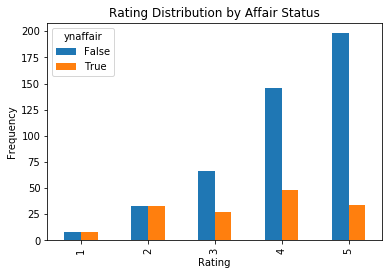

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
#Barplot of rating grouped by ynaffair
pd.crosstab(Affairs.rating, Affairs.ynaffair.astype(bool)).plot(kind='bar')
plt.title('Rating Distribution by Affair Status')
plt.xlabel('Rating')
plt.ylabel('Frequency')

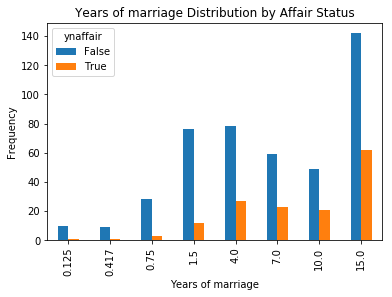

In [6]:
#Barplot of years of marriage grouped by ynaffair
pd.crosstab(Affairs.yearsmarried, Affairs.ynaffair.astype(bool)).plot(kind='bar')
plt.title('Years of marriage Distribution by Affair Status')
plt.xlabel('Years of marriage')
plt.ylabel('Frequency')

In [7]:
#Transform gender variable, 1 represents male, 0 represents female
#Transform children variable, 1 represents yes, 0 represents no
Affairs['gender_1'] = (Affairs.gender == 'male').astype(int)
Affairs['ynchildren'] = (Affairs.children == 'yes').astype(int)
print(Affairs.head())

   affairs  gender   age  yearsmarried children  religiousness  education  \
0        0    male  37.0         10.00       no              3         18   
1        0  female  27.0          4.00       no              4         14   
2        0  female  32.0         15.00      yes              1         12   
3        0    male  57.0         15.00      yes              5         18   
4        0    male  22.0          0.75       no              2         17   

   occupation  rating  ynaffair  gender_1  ynchildren  
0           7       4         0         1           0  
1           6       4         0         0           0  
2           1       4         0         0           1  
3           6       5         0         1           1  
4           6       3         0         1           0  


In [8]:
#Select response y and predictors X
y = Affairs['ynaffair']
cols_to_keep = ['age', 'yearsmarried', 'religiousness', 'education', 'occupation', 'rating', 
                'gender_1', 'ynchildren']
X = Affairs[cols_to_keep]

In [9]:
#Select response y and predictors X
y = Affairs['ynaffair']
cols_to_keep = ['age', 'yearsmarried', 'religiousness', 'education', 'occupation', 'rating', 
                'gender_1', 'ynchildren']
X = Affairs[cols_to_keep]

In [10]:
#Instantiate a logistic regression model
#Fit with X and y
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X, y)

In [12]:
#Check the accuracy of the model
model.score(X, y)

0.76039933444259566

In [13]:
model.coef_

array([[-0.03914177,  0.09024679, -0.30524393,  0.0443777 ,  0.02602644,
        -0.44633786,  0.23180506,  0.40033067]])

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
logit = sm.Logit(Affairs['ynaffair'], Affairs[cols_to_keep])
affair_mod = logit.fit()
print(affair_mod.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.509098
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               ynaffair   No. Observations:                  601
Model:                          Logit   Df Residuals:                      593
Method:                           MLE   Df Model:                            7
Date:                Thu, 12 Oct 2017   Pseudo R-squ.:                 0.09393
Time:                        15:10:14   Log-Likelihood:                -305.97
converged:                       True   LL-Null:                       -337.69
                                        LLR p-value:                 3.092e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
age              -0.0333      0.017     -2.012      0.044      -0.066      -0.001
yearsmarried      0.

In [15]:
#Flatten y into a 1-D array
y = np.ravel(y)

In [18]:
#Split the data into training and testing
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
#Build logistic regression model on training data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [20]:
#Run the model on the test set
y_pred = model.predict(X_test)

In [21]:
#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[110   8]
 [ 27   6]]


In [22]:
#Compute FPR and TPR
from sklearn.metrics import roc_curve
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

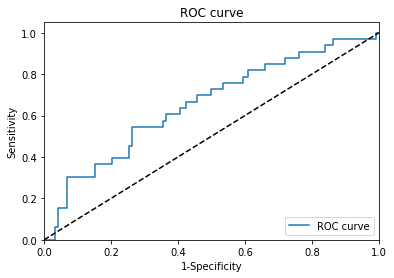

In [23]:
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()